by Artur Roos. No AI used.

# Wolt's Customer Dataset Takehome Analysis

## Preface

This is a huge dataset and would take a lot of time to explore properly, instead I tried to focus on the things we covered in the course adding a touch of my knowledge.

I looked at the general trends in Finland specifically to simplify my exploration.

## General Overview

In [133]:
%pip install pandas numpy==2.0.0 seaborn ruptures

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera, linregress, ttest_1samp
import matplotlib.pyplot as plt
import ruptures as rpt
import json

In [135]:
df = pd.read_csv('./dataset.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [136]:
print(len(df))
print(len(df.drop_duplicates()))

21983
21983


## Filtering / Preprocessing

In [137]:
df = df[(df["PURCHASE_COUNT"] != 0) & ~(df["FIRST_PURCHASE_DAY"].isna() | df["LAST_PURCHASE_DAY"].isna())]
df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2020-10-15 00:00:00.000,2020-10-15 00:00:00.000,21974,0.0,0.0,...,0.0,1.0,NaN,False,19.0,6.0,NaN,NaN,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21975,2019-09-30 00:00:00.000,GRC,4,4.0,0.0,2020-04-11 00:00:00.000,2020-04-27 00:00:00.000,21976,2.0,2.0,...,0.0,4.0,NaN,True,12.0,5.0,5.0,5.0,11.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21976,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-03 00:00:00.000,2019-10-03 00:00:00.000,21977,0.0,0.0,...,0.0,1.0,NaN,False,22.0,1.0,NaN,NaN,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [138]:
(df["LAST_PURCHASE_DAY"] < df["FIRST_PURCHASE_DAY"]).value_counts()

False    11964
Name: count, dtype: int64

In [139]:
(df["FIRST_PURCHASE_DAY"] < df["REGISTRATION_DATE"]).value_counts()

False    11964
Name: count, dtype: int64

In [140]:
df["REGISTRATION_COUNTRY"].unique()

array(['FIN', 'DNK', 'GRC', 'LVA', 'FRA', 'CZE', 'GBR', 'SWE', 'ISR',
       'EST', 'NOR', 'CAN', 'HUN', 'POL', 'LTU', 'DEU', 'HRV', 'CYP',
       'ARE'], dtype=object)

In [141]:
df["REGISTRATION_COUNTRY"] = df["REGISTRATION_COUNTRY"].astype('category')

In [142]:
# Here we get some countries that have 0 registrars but are somehow still part of the category?
# I'm not sure how that happened? I guess it's because some categories were filtered out
df["REGISTRATION_COUNTRY"].value_counts()

REGISTRATION_COUNTRY
FIN    5436
DNK    4938
GRC    1530
NOR      13
EST      13
HUN       5
CZE       4
SWE       4
POL       4
LVA       3
ISR       3
LTU       2
GBR       2
FRA       2
ARE       1
CYP       1
CAN       1
DEU       1
HRV       1
Name: count, dtype: int64

In [143]:
for col in ["LAST_PURCHASE_DAY", "FIRST_PURCHASE_DAY", "REGISTRATION_DATE"]:
    df[col] = pd.to_datetime(df[col])

In [144]:
df.iloc[0]["PURCHASE_COUNT_BY_STORE_TYPE"]

'{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}'

In [145]:
df.isna().mean()

REGISTRATION_DATE                          0.000000
REGISTRATION_COUNTRY                       0.000000
PURCHASE_COUNT                             0.000000
PURCHASE_COUNT_DELIVERY                    0.000000
PURCHASE_COUNT_TAKEAWAY                    0.000000
FIRST_PURCHASE_DAY                         0.000000
LAST_PURCHASE_DAY                          0.000000
USER_ID                                    0.000000
BREAKFAST_PURCHASES                        0.000000
LUNCH_PURCHASES                            0.000000
EVENING_PURCHASES                          0.000000
DINNER_PURCHASES                           0.000000
LATE_NIGHT_PURCHASES                       0.000000
TOTAL_PURCHASES_EUR                        0.000000
DISTINCT_PURCHASE_VENUE_COUNT              0.000000
MIN_PURCHASE_VALUE_EUR                     0.000000
MAX_PURCHASE_VALUE_EUR                     0.000000
AVG_PURCHASE_VALUE_EUR                     0.000000
PREFERRED_DEVICE                           0.000084
IOS_PURCHASE

In [146]:
df["USER_HAS_VALID_PAYMENT_METHOD"].unique()

df["USER_HAS_VALID_PAYMENT_METHOD"] = df["USER_HAS_VALID_PAYMENT_METHOD"].fillna(False)
df["USER_HAS_VALID_PAYMENT_METHOD"]

1        False
2         True
7         True
12        True
13       False
         ...  
21973    False
21975     True
21976    False
21978    False
21982     True
Name: USER_HAS_VALID_PAYMENT_METHOD, Length: 11964, dtype: bool

In [147]:
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
7,2019-09-01,FIN,1,1.0,0.0,2020-10-14,2020-10-14,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
12,2019-09-01,FIN,19,19.0,0.0,2020-04-18,2020-10-27,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01,FIN,2,2.0,0.0,2020-08-21,2020-09-09,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [148]:
df.dtypes

REGISTRATION_DATE                          datetime64[ns]
REGISTRATION_COUNTRY                             category
PURCHASE_COUNT                                      int64
PURCHASE_COUNT_DELIVERY                           float64
PURCHASE_COUNT_TAKEAWAY                           float64
FIRST_PURCHASE_DAY                         datetime64[ns]
LAST_PURCHASE_DAY                          datetime64[ns]
USER_ID                                             int64
BREAKFAST_PURCHASES                               float64
LUNCH_PURCHASES                                   float64
EVENING_PURCHASES                                 float64
DINNER_PURCHASES                                  float64
LATE_NIGHT_PURCHASES                              float64
TOTAL_PURCHASES_EUR                               float64
DISTINCT_PURCHASE_VENUE_COUNT                     float64
MIN_PURCHASE_VALUE_EUR                            float64
MAX_PURCHASE_VALUE_EUR                            float64
AVG_PURCHASE_V

In [149]:
df = df[df["REGISTRATION_COUNTRY"] == "FIN"]

## Descriptive Summary

### Numerical

In [150]:
numerical_df = df[[col for col in df.columns if pd.api.types.is_numeric_dtype(df[col].dtype) and df[col].dtype.name != "bool"]].copy()
numerical_df["ACTIVITY_PERIOD_DAYS"] = (df["LAST_PURCHASE_DAY"] - df["FIRST_PURCHASE_DAY"]).dt.days
numerical_df["ACTIVE_FREQUENCY"] = (df["PURCHASE_COUNT"] / numerical_df["ACTIVITY_PERIOD_DAYS"]).replace([np.inf, -np.inf], np.nan)
numerical_df.head()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,ACTIVITY_PERIOD_DAYS,ACTIVE_FREQUENCY
1,1,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,38.456,...,0.0,0.0,1.0,23.0,2.0,NaN,NaN,6.853,0,NaN
7,1,1.0,0.0,8,0.0,0.0,1.0,0.0,0.0,19.228,...,0.0,0.0,1.0,5.0,1.0,NaN,NaN,1.251,0,NaN
12,19,19.0,0.0,13,0.0,8.0,0.0,11.0,0.0,587.972,...,19.0,0.0,0.0,7.0,3.0,11.0,9.0,3.303,192,0.098958
13,2,2.0,0.0,14,0.0,1.0,1.0,0.0,0.0,118.404,...,0.0,0.0,2.0,5.0,6.0,19.0,19.0,1.382,19,0.105263
15,2,2.0,0.0,16,0.0,2.0,0.0,0.0,0.0,107.272,...,2.0,0.0,0.0,0.0,1.0,49.0,49.0,4.619,49,0.040816


In [151]:
numerical_df.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,ACTIVITY_PERIOD_DAYS,ACTIVE_FREQUENCY
count,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,5436.0,5436.000000,...,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000,3574.000000,3574.000000,5436.000000,5436.000000,3548.000000
mean,6.363503,5.984364,0.379139,11053.249448,0.231972,2.923841,0.483628,2.685247,0.0,171.517059,...,2.440765,0.819169,3.103569,11.486387,3.983260,63.752938,54.700336,5.989530,153.883738,0.093902
std,10.695877,10.402265,1.643341,6348.793241,0.883091,6.088801,1.375267,4.697128,0.0,296.470339,...,6.428031,3.988466,8.501082,6.963065,2.012814,71.812863,74.164555,3.459504,158.220004,0.273750
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000,0.000000,0.004751
25%,1.000000,1.000000,0.000000,5243.750000,0.000000,0.000000,0.000000,0.000000,0.0,31.372000,...,0.000000,0.000000,0.000000,5.000000,2.000000,18.250000,10.000000,3.005750,0.000000,0.017066
50%,3.000000,2.000000,0.000000,11793.000000,0.000000,1.000000,0.000000,1.000000,0.0,74.888000,...,0.000000,0.000000,0.000000,11.000000,4.000000,39.000000,24.000000,5.954500,98.000000,0.032097
75%,7.000000,6.000000,0.000000,16210.250000,0.000000,3.000000,0.000000,3.000000,0.0,194.304000,...,2.000000,0.000000,2.000000,18.000000,6.000000,80.750000,65.000000,9.003250,322.000000,0.064935
max,221.000000,221.000000,44.000000,21974.000000,17.000000,110.000000,26.000000,104.000000,0.0,7979.620000,...,144.000000,91.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.997000,426.000000,4.000000


In [152]:
numerical_df = numerical_df.drop(columns=["LATE_NIGHT_PURCHASES"])

In [153]:
numerical_df.median()

PURCHASE_COUNT                                 3.000000
PURCHASE_COUNT_DELIVERY                        2.000000
PURCHASE_COUNT_TAKEAWAY                        0.000000
USER_ID                                    11793.000000
BREAKFAST_PURCHASES                            0.000000
LUNCH_PURCHASES                                1.000000
EVENING_PURCHASES                              0.000000
DINNER_PURCHASES                               1.000000
TOTAL_PURCHASES_EUR                           74.888000
DISTINCT_PURCHASE_VENUE_COUNT                  2.000000
MIN_PURCHASE_VALUE_EUR                        18.252000
MAX_PURCHASE_VALUE_EUR                        33.528000
AVG_PURCHASE_VALUE_EUR                        25.300000
IOS_PURCHASES                                  0.000000
WEB_PURCHASES                                  0.000000
ANDROID_PURCHASES                              0.000000
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE       11.000000
MOST_COMMON_WEEKDAY_TO_PURCHASE                4

### Average Customer

In [154]:
numerical_df[["PURCHASE_COUNT_DELIVERY", "AVG_PURCHASE_VALUE_EUR", "TOTAL_PURCHASES_EUR", "DISTINCT_PURCHASE_VENUE_COUNT", "AVG_DAYS_BETWEEN_PURCHASES", "ACTIVITY_PERIOD_DAYS"]].dropna().describe()

,PURCHASE_COUNT_DELIVERY,AVG_PURCHASE_VALUE_EUR,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,AVG_DAYS_BETWEEN_PURCHASES,ACTIVITY_PERIOD_DAYS
count,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000
mean,8.611080,28.643508,245.762529,4.208450,63.752938,234.054841
std,12.017496,15.864706,342.636571,3.399499,71.812863,138.959148
min,0.000000,3.036000,7.084000,1.000000,0.000000,0.000000
25%,2.000000,20.240000,74.129000,2.000000,18.250000,104.250000
50%,5.000000,26.312000,139.656000,3.000000,39.000000,253.000000
75%,10.000000,33.396000,289.179000,5.000000,80.750000,369.000000
max,221.000000,569.756000,7979.620000,36.000000,421.000000,426.000000


In [155]:
# Days between purchases
(1 / numerical_df["ACTIVE_FREQUENCY"]).mean()

np.float64(42.84758938130364)

### Categorical

In [156]:
# Pie-chart coming later
df['PREFERRED_DEVICE'].value_counts(normalize=True)

PREFERRED_DEVICE
android    0.455934
ios        0.379025
web        0.165041
Name: proportion, dtype: float64

In [157]:
df['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(normalize=True)

USER_HAS_VALID_PAYMENT_METHOD
True     0.577447
False    0.422553
Name: proportion, dtype: float64

In [158]:
results = {}
for col in numerical_df:
    column = numerical_df[col]
    log_column = column.apply(np.log10)

    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    skew = column.skew()
    kurt = column.kurt()
    jb, pvalue = jarque_bera(column)

    results[col] = {
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "skew": skew,
        "kurt": kurt,
        "jarque-bera": np.round(np.log10(jb), 2),
        "normality-p-value": pvalue,
    }

results = pd.DataFrame.from_dict(results, orient="index")

display(results)

,q1,q3,iqr,skew,kurt,jarque-bera,normality-p-value
PURCHASE_COUNT,1.000000,7.000000,6.000000,5.700204,59.532915,5.92,0.000000e+00
PURCHASE_COUNT_DELIVERY,1.000000,6.000000,5.000000,5.967441,65.362459,6.00,0.000000e+00
PURCHASE_COUNT_TAKEAWAY,0.000000,0.000000,0.000000,10.907538,183.156130,6.89,0.000000e+00
USER_ID,5243.750000,16210.250000,10966.500000,-0.094919,-1.217699,2.54,1.999863e-75
BREAKFAST_PURCHASES,0.000000,0.000000,0.000000,7.696065,88.876086,6.26,0.000000e+00
LUNCH_PURCHASES,0.000000,3.000000,3.000000,7.073343,81.771032,6.19,0.000000e+00
EVENING_PURCHASES,0.000000,0.000000,0.000000,6.531999,67.104046,6.02,0.000000e+00
DINNER_PURCHASES,0.000000,3.000000,3.000000,5.361192,59.200413,5.91,0.000000e+00
TOTAL_PURCHASES_EUR,31.372000,194.304000,162.932000,8.550097,158.243779,6.76,0.000000e+00
DISTINCT_PURCHASE_VENUE_COUNT,1.000000,4.000000,3.000000,2.968818,14.222733,4.73,0.000000e+00


A lot of big right tails.
Jarque-Bera generally high, supporting the idea of a lot of tails.
Will probably take logs everywhere.

* USER_IDs are uniformly distributed, probably to depersonalize the data.
* Absolutely massive kurtosis on MAX_PURCHASE_VALUE_EUR, very big tail.
* AVERAGE_DELIVERY_DISTANCE_KMS has a negative tail, so very few people ordering delivery live near the locations.
* Most people order from the same restaurants, given DISTINCT_PURCHASE_VENUE_COUNT
* Purchases on specific devices have high kurtosis too, so the people who order using that device usually prefer it.
* MIN_PURCHASE_VALUE_EUR around ~20 EUR and MAX_PURCHASE_VALUE_EUR ~36 EUR, with an average of (20+36)/2 = 28, checks out with AVG_PURCHASE_VALUE_EUR = 28.5, probably nice and linear

#### Average Delivery Distance

<Axes: xlabel='AVG_DAYS_BETWEEN_PURCHASES', ylabel='Count'>

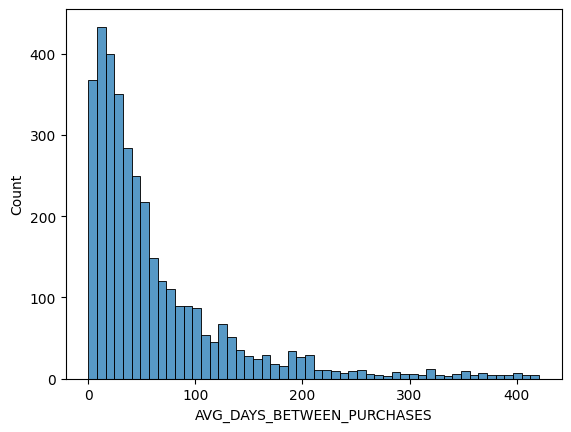

In [159]:
sns.histplot(numerical_df["AVG_DAYS_BETWEEN_PURCHASES"])

#### MAX PURCHASE VALUE big tail

<Axes: xlabel='MAX_PURCHASE_VALUE_EUR', ylabel='Count'>

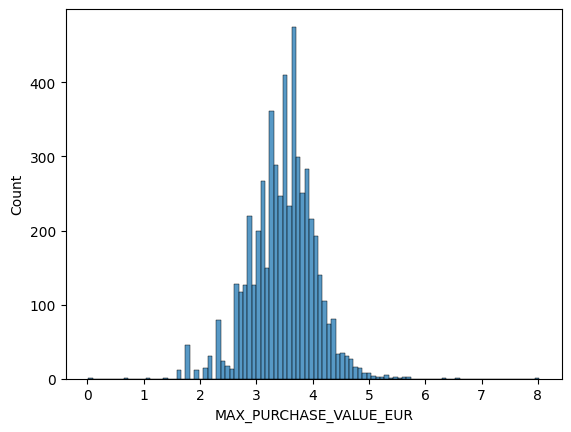

In [160]:
sns.histplot(np.log(numerical_df["MAX_PURCHASE_VALUE_EUR"]))

Weird spikes? Possibly truncated data, although I am not sure how one would detect that.

In [ ]:
sns.ecdfplot(numerical_df, x="MAX_PURCHASE_VALUE_EUR")

<Axes: xlabel='MAX_PURCHASE_VALUE_EUR', ylabel='Proportion'>

#### USER IDs

In [ ]:
pearsonr(numerical_df["USER_ID"], numerical_df.index)

Hypothesis confirmed, USER_IDs are indeed uniform

#### Checking if the data is normal

In [ ]:
sns.histplot(numerical_df, x="TOTAL_PURCHASES_EUR").set_xlabel("Total Purchases")

In [ ]:
sns.histplot(np.log10(numerical_df["TOTAL_PURCHASES_EUR"])).set_xlabel("Total Purchases (log10)")

Negative exponential distribution with a slight skew to the left! Nice

For calculating the correlation matrix it also makes sense to take the log of the data. I'm pretty confident that Kendall's correlation is preserved under monotonic operations (log is monotonic), so using it for log-normal data is only appropriate.

In [ ]:
correlation_matrix = numerical_df.corr(method="kendall")
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linecolor="white",
    vmin = -1.
)

* LUNCH_PURCHASES and DINNER_PURCHASES are very similar to PURCHASE_COUNT, so they are the main providers of revenue.
* PURCHASE_COUNT and PURCHASE_COUNT_DELIVERY are basically identical, so most people order takeout
* PURCHASE_COUNT and DISTINCT_PURCHASE_VENUE_COUNT are very similar too, so people who buy more tend to experiment with a variety of spots.
* MIN_PURCHASE_VALUE_EUR is negatively-correlated with PURCHASE_COUNT, frequent buyers
* AVG_DAYS_BETWEEN_PURCHASES is negatively-correlated with PURCHASE_COUNT, understandably if someone buys more they are probably doing that over a shorter period of time.
* No particular correlatons for specific platforms.
* Weekday and hour are useless in terms of correlations.
* For all of those variables we can establish regressions.
* ANDROID purchases is negatively correlated with IOS purchases

In [ ]:
sns.scatterplot(numerical_df[["AVG_DAYS_BETWEEN_PURCHASES", "PURCHASE_COUNT"]].apply(np.log), x="AVG_DAYS_BETWEEN_PURCHASES", y="PURCHASE_COUNT")

In [ ]:
ax = sns.histplot(numerical_df, x="AVG_DAYS_BETWEEN_PURCHASES")

In [ ]:
sns.histplot(numerical_df, x="PURCHASE_COUNT")

### Recency, Frequency, Monetary

In [ ]:
rfm_df = df[["LAST_PURCHASE_DAY", "FIRST_PURCHASE_DAY", "PURCHASE_COUNT", "TOTAL_PURCHASES_EUR"]][df["LAST_PURCHASE_DAY"] != df["FIRST_PURCHASE_DAY"]].dropna()

In [ ]:
def quintile(series, q=5):
    return pd.qcut(series, q=q, duplicates='drop', labels=range(q)).astype(int)

reference_date = rfm_df["LAST_PURCHASE_DAY"].max()

rfm_df["DAYS_SINCE_LAST_PURCHASE"] = (reference_date - rfm_df["LAST_PURCHASE_DAY"]).dt.days
# minus sign because less => better
rfm_df["RECENCY"] = quintile(-rfm_df["DAYS_SINCE_LAST_PURCHASE"])

active_days = (rfm_df["LAST_PURCHASE_DAY"] - rfm_df["FIRST_PURCHASE_DAY"]).dt.days
rfm_df["FREQUENCY"] = quintile(rfm_df['PURCHASE_COUNT'] / active_days)
rfm_df["MONETARY"] = quintile(rfm_df["TOTAL_PURCHASES_EUR"])

rfm_df["SCORE"] = rfm_df[["RECENCY", "FREQUENCY", "MONETARY"]].sum(axis=1)

rfm_df.head()

In [ ]:
# Black magic
monetary_pivot = rfm_df.groupby(["RECENCY", "FREQUENCY"])["MONETARY"].mean().unstack(fill_value=0)
monetary_pivot

In [ ]:
count_annotations = rfm_df.groupby(["RECENCY", "FREQUENCY"]).size().unstack(fill_value=0).map(str)
count_annotations

In [ ]:
ax = sns.heatmap(
    monetary_pivot,
    annot=count_annotations,
    fmt="",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': 'MONETARY'}
)

# Y axis flows top-down for some reason, invert that
ax.invert_yaxis()

We can notice that people who order most often but have not discovered recently are significantly less monetarily valuable, we are probably losing them.

In [ ]:
df[["TOTAL_PURCHASES_EUR", "PURCHASE_COUNT"]].corr()

## Time-based Analysis

In [ ]:
time_df = df.copy()
time_df = time_df[time_df["FIRST_PURCHASE_DAY"].notna() & time_df["LAST_PURCHASE_DAY"].notna()]
time_df['FIRST_PURCHASE_MONTH'] = time_df['FIRST_PURCHASE_DAY'].dt.to_period('M')
time_df['FIRST_PURCHASE_MONTH_TS'] = time_df['FIRST_PURCHASE_MONTH'].dt.to_timestamp()
time_df['LAST_PURCHASE_MONTH'] = time_df['LAST_PURCHASE_DAY'].dt.to_period('M')

In [ ]:
monthly_revenue_flux = time_df.groupby('FIRST_PURCHASE_MONTH_TS')[['PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR']].sum()
monthly_revenue_flux

In [ ]:
sns.lineplot(monthly_revenue_flux, x="FIRST_PURCHASE_MONTH_TS", y="PURCHASE_COUNT")

I'm hoping I passed the data correctly, something very clearly happened. Sadly, Wolt is not a public company so I can't check if the crash in sales aligns with any particular event.

I would go as far as to say that this is actually anomalous. It is possible that the data was tampered with, possibly clumping old orders into 2019-09.

In [ ]:
df["FIRST_PURCHASE_DAY"].value_counts().sort_index()

Very confusing, no idea what's actually happening.

In [ ]:
time_df['FIRST_MONTH'] = time_df['FIRST_PURCHASE_DAY'].dt.to_period('M').dt.to_timestamp()
time_df['LAST_MONTH'] = time_df['LAST_PURCHASE_DAY'].dt.to_period('M').dt.to_timestamp()
months = pd.date_range(time_df['FIRST_MONTH'].min(), time_df['LAST_MONTH'].max(), freq='MS')
months

In [ ]:
# a bit crude, but will do

user_active = []
for _, row in time_df.iterrows():
    if pd.notnull(row['FIRST_MONTH']) and pd.notnull(row['LAST_MONTH']):
        months = pd.date_range(row['FIRST_MONTH'], row['LAST_MONTH'], freq='MS')
        for month in months:
            user_active.append({'USER_ID': row['USER_ID'], 'MONTH': month})


user_count_df = pd.DataFrame(user_active).groupby('MONTH')['USER_ID'].count()

time_df["ACTIVE_USERS"] = user_count_df

In [ ]:
user_count_df

In [ ]:
ax = sns.lineplot(user_count_df).set_title("Active Users Over Time")
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

Bump in spring 2020, COVID-19 influence?

In [ ]:
pearsonr(user_count_df.to_numpy(), monthly_revenue_flux["TOTAL_PURCHASES_EUR"].to_numpy())

In [ ]:
cum_user_count = user_count_df.reset_index()
cum_user_count["MONTH"] = cum_user_count["MONTH"].dt.year * 12 + cum_user_count["MONTH"].dt.month
signal = cum_user_count.to_numpy()
popmean = cum_user_count["USER_ID"]

pelt = rpt.Pelt(model="l2").fit(signal)
changes = pelt.predict(pen=1000)

window = [0] + changes
for i in range(len(window) - 1):
    begin, end = window[i], window[i + 1]
    s = cum_user_count.loc[begin:end]

sns.scatterplot(user_count_df.reset_index().loc[changes[:-1]], x="MONTH", y="USER_ID", color="r", zorder=10)
sns.lineplot(user_count_df).set_title("Active Users Over Time")
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

Surprisingly weak correlation here. Much weaker than I would have expected.

In [ ]:
sns.lineplot(x=user_count_df.to_numpy(), y=monthly_revenue_flux["TOTAL_PURCHASES_EUR"].to_numpy())

Very clear change in trend after some point, really curious to see why that's that.

In [ ]:
sns.countplot(
    x='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
    data=time_df,
    order=sorted(time_df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].dropna().unique())
)
plt.xticks(rotation=90)

In [ ]:
time_df.groupby("MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE").size().reset_index().corr()

In [ ]:
weekdays = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
time_df['MOST_COMMON_WEEKDAY_LABEL'] = time_df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].map(weekdays)

In [ ]:
sns.countplot(x='MOST_COMMON_WEEKDAY_LABEL', data=time_df, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

In [ ]:
meal_totals = df[[
    'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
    'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES'
]].sum().sort_values(ascending=False)

In [ ]:
ax = meal_totals.plot(kind='bar', title='Total Orders by Time of Day')
plt.xticks(rotation=20)
plt.tight_layout()

### Device

In [ ]:
device_df = df.copy()
device_df["PREFERRED_DEVICE"] = df['PREFERRED_DEVICE'].fillna('unknown')

In [ ]:
device_portions = np.round(device_df["PREFERRED_DEVICE"].value_counts(normalize=True) * 100, 2)
device_portions

In [ ]:
plt.pie(x=device_portions, labels=device_portions.index, autopct='%1.2f%%')